In [1]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
#import nltk
#nltk.download('stopwords')

In [2]:
# Set working directory
os.chdir('/home/54b3e09d-d775-4c65-93b7-67c241d43466/5510_Final_Project')

In [3]:
# Read data set
df = pd.read_csv('Job_Postings_US new.csv')
df

,ID,job_posted_date,company_address_locality,company_address_region,company_name,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer
...,...,...,...,...,...,...,...,...,...
992,992,2025-04-03,Menlo Park,CA,Meta,Meta's mission is to build the future of human...,Reality Labs at Meta is building products that...,Not Applicable,"Software Engineer, Computer Vision - Reality Labs"
993,993,2025-04-01,Houston,Texas,The Lab Consulting,The Lab is a management consulting firm that h...,"We are a mid-sized Management Consulting, Auto...",Mid-Senior level,Data Scientist
994,994,2025-04-02,New York,NY,FanDuel,FanDuel Group is an innovative sports-tech ent...,About FanduelFanDuel Group is the premier mobi...,Director,Software Engineer - React
995,995,2025-04-01,Mountain View,CA,"X, The Moonshot Factory",We create breakthrough technologies to help so...,"About The TeamTapestry, is X’s moonshot for th...",Mid-Senior level,"Machine Learning Engineer, Tapestry"


In [4]:
%%markdown 
To get a better view of the dataset, I made some descriptive plots. 

#### Companies
In the first plot I look at the companies and how often they occur in the data set. TikTok, the company with the most data science job postings, has 88 of them. This is about 0.9% of total vacancies. 



To get a better view of the dataset, I made some descriptive plots. 

#### Companies
In the first plot I look at the companies and how often they occur in the data set. TikTok, the company with the most data science job postings, has 88 of them. This is about 0.9% of total vacancies. 



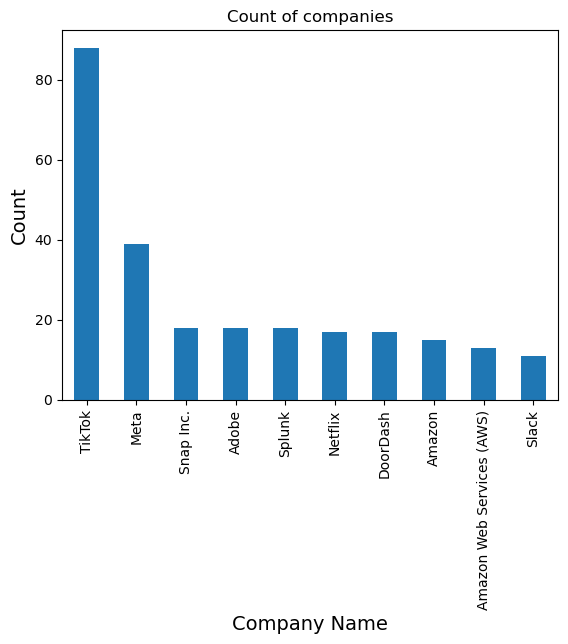

In [5]:
# The ten companies with the highest amount of vacancies.
df.groupby('company_name')['company_name'].count().sort_values(ascending= False).head(10).plot(kind= 'bar')
plt.ylabel('Count', fontsize = 14)
plt.xlabel('Company Name', fontsize = 14)
plt.xticks()
plt.title('Count of companies')
plt.show()

In [6]:
%%markdown
#### Frequency of counts 
Given that with 0.9% a company could claim the most data science jobs openings, I presume the data set is widely dispersed in terms of companies. 
This is true: 388 companies had posted exactly one vacancy and an additional 86 companies posted 2 vacancies. These two categories account for more than half of alle entries:
                                                                                                                                                    $388 + 2*86 = 560$. 

#### Frequency of counts 
Given that with 0.9% a company could claim the most data science jobs openings, I presume the data set is widely dispersed in terms of companies. 
This is true: 388 companies had posted exactly one vacancy and an additional 86 companies posted 2 vacancies. These two categories account for more than half of alle entries:
                                                                                                                                                    $388 + 2*86 = 560$. 


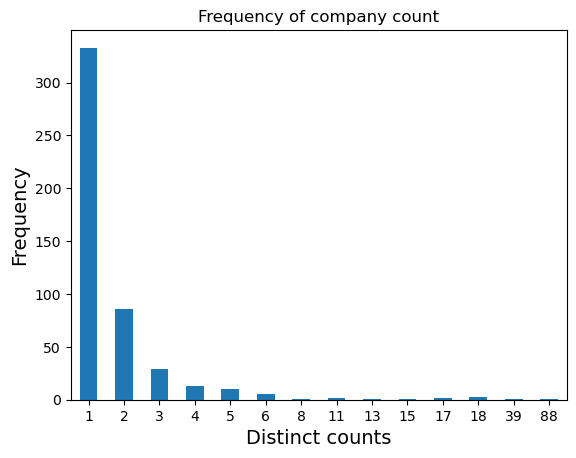

In [7]:
company_counts = df.groupby('company_name')['company_name'].count()
counts = pd.DataFrame(company_counts)
counts.rename(columns={"company_name": "counts"}, inplace = True)

counts.groupby('counts')['counts'].count().plot(kind= 'bar')
plt.title('Frequency of company count')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Distinct counts', fontsize = 14)
plt.xticks(rotation=0)
plt.show()

In [10]:
%%markdown
#### Seniority level
Next up is the Seniority level, I intend this to be the variable to predict. So I'd like to know the categories and the accompanying frequencies.<br> 
The plot shows there are three common categories: 'Mid-Senior level', 'Entry level' and 'Not Applicable'. 'Internship' occurs less than 100 times and the rest of the categories have even 
less than 50 frequencies.

#### Seniority level
Next up is the Seniority level, I intend this to be the variable to predict. So I'd like to know the categories and the accompanying frequencies.<br> 
The plot shows there are three common categories: 'Mid-Senior level', 'Entry level' and 'Not Applicable'. 'Internship' occurs less than 100 times and the rest of the categories have even 
less than 50 frequencies.


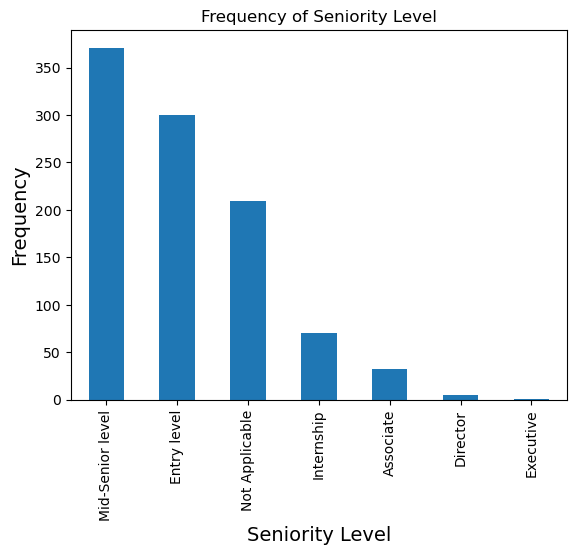

In [11]:
df.groupby('seniority_level')['seniority_level'].count().sort_values(ascending= False).plot(kind= 'bar')
plt.title('Frequency of Seniority Level')
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Seniority Level', fontsize = 14)
plt.show()

In [12]:
%%markdown 
From a prediction perspective, neither the categories with a count of less than 50 nor the category 'Not applicable' was appealing to work with: I drop these categories. 
This left me with 'Mid-Senior level', 'Entry level' and 'Internship' as the top three categories.<br> While an entry level position and an internship are technically different, 
presumably they are both aimed at applicants with little work experience. Therefore, I merge these categories into one category: 'Junior Level'.<br>
An added advantage is that I have two balanced categories: 'Mid-Senior Level' and 'Junior Level' have respectively 371 and 370 categories.    

From a prediction perspective, neither the categories with a count of less than 50 nor the category 'Not applicable' was appealing to work with: I drop these categories. 
This left me with 'Mid-Senior level', 'Entry level' and 'Internship' as the top three categories.<br> While an entry level position and an internship are technically different, 
presumably they are both aimed at applicants with little work experience. Therefore, I merge these categories into one category: 'Junior Level'.<br>
An added advantage is that I have two balanced categories: 'Mid-Senior Level' and 'Junior Level' have respectively 371 and 370 categories.    


In [13]:
# Select only the categories 'Mid-Senior level', 'Entry level' and 'Internship' 
df_new = pd.concat( [df[df.seniority_level == 'Mid-Senior level'], df[df.seniority_level == 'Entry level'], df[df.seniority_level == 'Internship']])
# Replace 'Entry level' and 'Internship' with 'Junior level'  
df_new.replace({'seniority_level': {'Entry level': 'Junior level', 'Internship': 'Junior level'}}, inplace= True)
df_new

,ID,job_posted_date,company_address_locality,company_address_region,company_name,company_description,job_description_text,seniority_level,job_title
1,1,2025-03-14,San Francisco,California,Ikigai,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
4,4,2025-03-28,Boston,Massachusetts,HMH,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer
21,21,2025-03-25,London,United Kingdom,National Grid,National Grid lies at the heart of a transform...,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,"Senior Data Scientist, Data Science"
22,22,2025-04-09,London,United Kingdom,National Grid,National Grid lies at the heart of a transform...,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,"Senior Data Scientist, Data Science"
23,23,2025-03-25,London,United Kingdom,National Grid,National Grid lies at the heart of a transform...,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,"Senior Data Scientist, Data Science"
...,...,...,...,...,...,...,...,...,...
965,965,2025-04-03,Omaha,Nebraska,Aviture,Unlock the Art of the Possible with Aviture. A...,What is Aviture?Aviture is a full-service tech...,Junior level,Software Engineer Internship
976,976,2025-04-09,Camarillo,CA,Semtech,Semtech Corporation is a high-performance semi...,Location: US RemoteJob SummaryWe are seeking a...,Junior level,Artificial Intelligence / Data Scientist Inter...
980,980,2025-04-04,Los Angeles,California,TikTok,TikTok is the world's leading destination for ...,ResponsibilitiesThe Business Risk Integrated C...,Junior level,Machine Learning Engineer Intern (LLM Risk Sur...
981,981,2025-04-09,Camarillo,CA,Semtech,Semtech Corporation is a high-performance semi...,Location: US RemoteJob SummaryWe are seeking a...,Junior level,Artificial Intelligence / Data Scientist Inter...


In [14]:
%%markdown
#### Company name across seniority level
After setting the predictor variable it is appropriate to look at the division of the variables accross the seniority level. First is company name. 
The bar plots show that there are no companies with more than 15 vacancies at the junior or mid-senior level except TikTok, which has 75 vacancies at the junior level. Because of the difference in TikTok vacancies between the junior and mid-senior levels in addition to TikTok outnumbering other companies, 
I will transform the variable company into whether the vacancy is a TikTok vacancy.

#### Company name across seniority level
After setting the predictor variable it is appropriate to look at the division of the variables accross the seniority level. First is company name. 
The bar plots show that there are no companies with more than 15 vacancies at the junior or mid-senior level except TikTok, which has 75 vacancies at the junior level. Because of the difference in TikTok vacancies between the junior and mid-senior levels in addition to TikTok outnumbering other companies, 
I will transform the variable company into whether the vacancy is a TikTok vacancy.


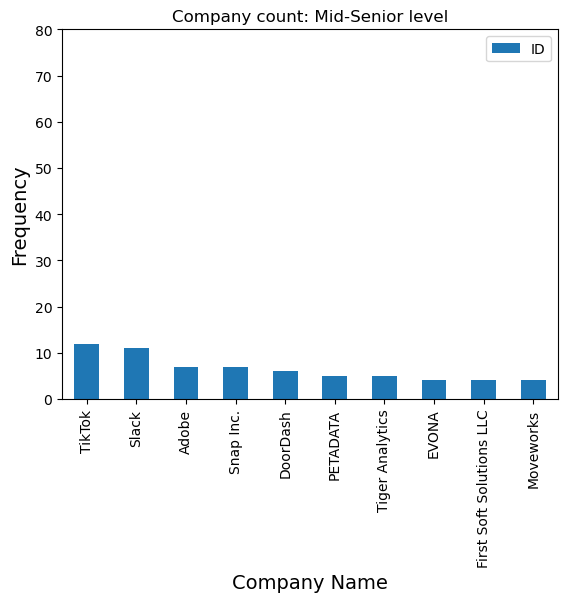

In [15]:
group_df_new = df_new.groupby(['seniority_level','company_name'])[['ID']].count().sort_values(ascending = False, by = ['seniority_level' ,'ID'])
group_df_new.loc['Mid-Senior level'].head(10).plot(kind= 'bar')
plt.title('Company count: Mid-Senior level')
plt.xlabel('Company Name', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.ylim(0, 80)
plt.show()

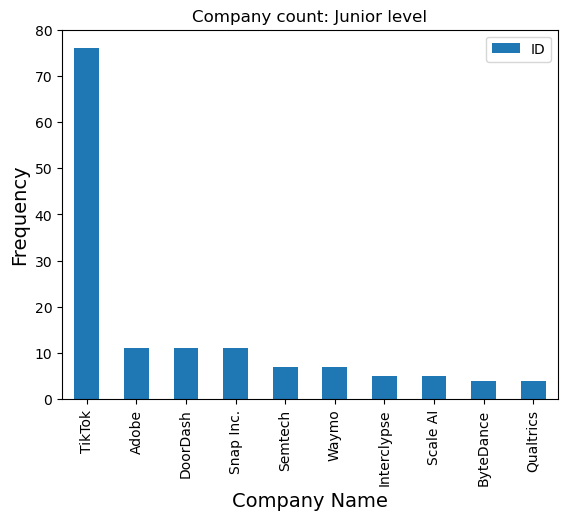

In [16]:
group_df_new.loc['Junior level'].head(10).plot(kind= 'bar')
plt.title('Company count: Junior level')
plt.xlabel('Company Name', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.ylim(0, 80)
plt.show()

In [17]:
%%markdown
#### Company Region across seniority level
The next variable is the region the company (and the vacancy) is in. Besides the naming inconsistencies (For instance both 'MA' and 'Massachusetts') it is immediately clear most vacancies are in California ('California' and 'CA'). The totals are:
- Junior Level: 199 vacancies (on 370 vacancies). 
- Mid-Senior Level: 159 vacancies (on 371 vacancies).

Because of this relative difference, the feature 'company region', and more specifically whether it is in California is information. 
For this reason I'm transforming `company_address_region` into 'Cali_ind'.    

#### Company Region across seniority level
The next variable is the region the company (and the vacancy) is in. Besides the naming inconsistencies (For instance both 'MA' and 'Massachusetts') it is immediately clear most vacancies are in California ('California' and 'CA'). The totals are:
- Junior Level: 199 vacancies (on 370 vacancies). 
- Mid-Senior Level: 159 vacancies (on 371 vacancies).

Because of this relative difference, the feature 'company region', and more specifically whether it is in California is information. 
For this reason I'm transforming `company_address_region` into 'Cali_ind'.    


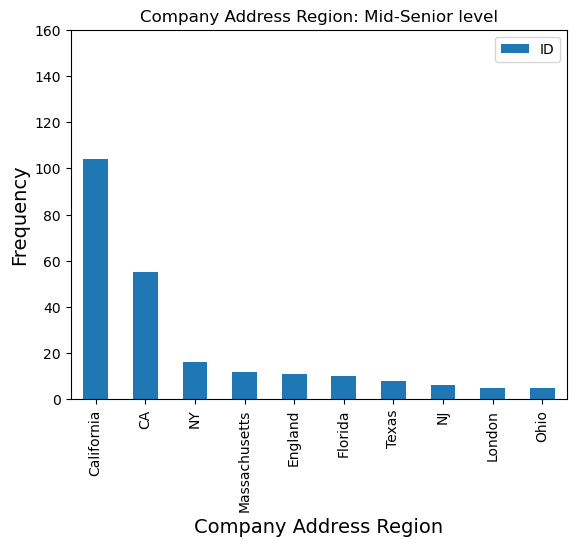

In [18]:
group_df_new_I = df_new.groupby(['seniority_level','company_address_region'])[['ID']].count().sort_values(ascending = False, by = ['seniority_level' ,'ID'])
group_df_new_I.loc['Mid-Senior level'].head(10).plot(kind= 'bar')
plt.title('Company Address Region: Mid-Senior level')
plt.xlabel('Company Address Region', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.ylim(0, 160)
plt.show()

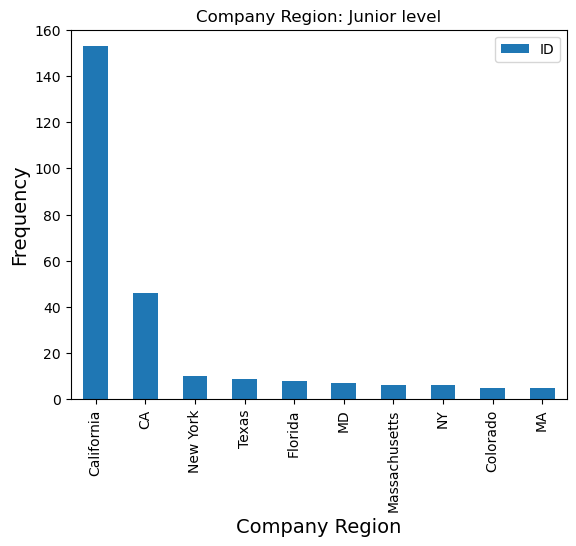

In [19]:
group_df_new_I.loc['Junior level'].head(10).plot(kind= 'bar')
plt.title('Company Region: Junior level')
plt.xlabel('Company Region', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.ylim(0, 160)
plt.show()

In [18]:
%%markdown
#### Adding TikTok_ind and Cali_ind 

#### Adding TikTok_ind and Cali_ind 


In [20]:
# Function to add feature TikTok_ind
def classify_company(row):
    if row['company_name'] == 'TikTok':
        return '1'
    else:
        return '0'
        
df_new['TikTok_ind'] = df_new.apply(classify_company, axis=1)

# Function to add feature Cali_ind
def classify_address_region(row):
    if row['company_address_region'] == 'California':
        return '1'
    elif row['company_address_region'] == 'CA':
        return '1'
    else:
        return '0'

df_new['Cali_ind'] = df_new.apply(classify_address_region, axis=1)

df_expanded = df_new.iloc[:,[0,1,2,3,10,4,9,5,6,7,8]]

In [21]:
%%markdown
After adding `Cali_ind` and `TikTok_ind`, the dataset looks like this:

After adding `Cali_ind` and `TikTok_ind`, the dataset looks like this:


In [22]:
pre_model = df_expanded.loc[:,['ID', 'Cali_ind', 'TikTok_ind', 'job_description_text', 'seniority_level']]
pre_model.head(5)

,ID,Cali_ind,TikTok_ind,job_description_text,seniority_level
1,1,1,0,Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level
4,4,0,0,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level
21,21,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level
22,22,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level
23,23,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level


In [23]:
%%markdown
#### Word count across seniority level
To see whether the word count differs across seniority levels I made a box plot. It shows the distribution is fairly even.  

#### Word count across seniority level
To see whether the word count differs across seniority levels I made a box plot. It shows the distribution is fairly even.  


In [24]:
pre_model["nr_words"] = pre_model["job_description_text"].apply(lambda n: len(n.split()))
pre_model

,ID,Cali_ind,TikTok_ind,job_description_text,seniority_level,nr_words
1,1,1,0,Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,558
4,4,0,0,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,505
21,21,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,791
22,22,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,856
23,23,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level,791
...,...,...,...,...,...,...
965,965,0,0,What is Aviture?Aviture is a full-service tech...,Junior level,436
976,976,1,0,Location: US RemoteJob SummaryWe are seeking a...,Junior level,589
980,980,1,1,ResponsibilitiesThe Business Risk Integrated C...,Junior level,944
981,981,1,0,Location: US RemoteJob SummaryWe are seeking a...,Junior level,589


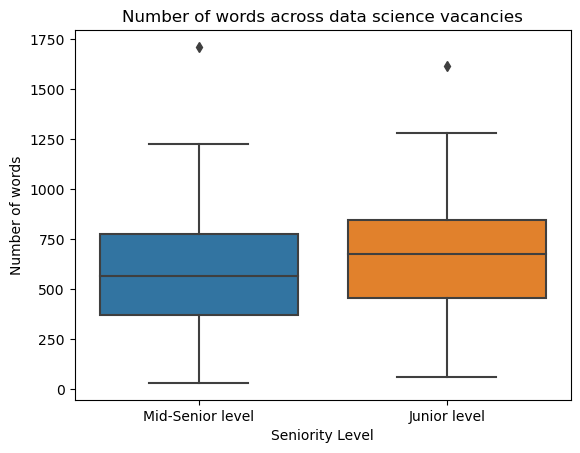

In [25]:
# Number of words across data science vacancies
sns.boxplot(data=pre_model, x="seniority_level", y="nr_words")
plt.xlabel('Seniority Level')
plt.ylabel('Number of words')
plt.title('Number of words across data science vacancies')
plt.show()

In [26]:
%%markdown
#### Bigrams across seniority level
The next step to get a better overview of the contents of the vacancy texts is to make bigrams. It is not surprising that some combinations of words like 'machine learning', 'computer science' and 'data science' appear in both lists of most frequent occuring bigrams.<br> 
However, in the top 10 lists there are some noticeable differences: Terms like 'inspire creativity', 'creativity bring' and 'bring joy' are relatively often used in junior level vacancies while 'years experience' is a lot more often used in the mid-senior level vacancies. 

#### Bigrams across seniority level
The next step to get a better overview of the contents of the vacancy texts is to make bigrams. It is not surprising that some combinations of words like 'machine learning', 'computer science' and 'data science' appear in both lists of most frequent occuring bigrams.<br> 
However, in the top 10 lists there are some noticeable differences: Terms like 'inspire creativity', 'creativity bring' and 'bring joy' are relatively often used in junior level vacancies while 'years experience' is a lot more often used in the mid-senior level vacancies. 


In [27]:
# see 'sources' for article in which this function appears 
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  stops = set(stopwords.words('english'))
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [word for word in words if word not in stops]

In [28]:
# Split dataset in order to make bigrams
bigram_ms = pre_model[pre_model.seniority_level == 'Mid-Senior level']
bigram_jr = pre_model[pre_model.seniority_level == 'Junior level']

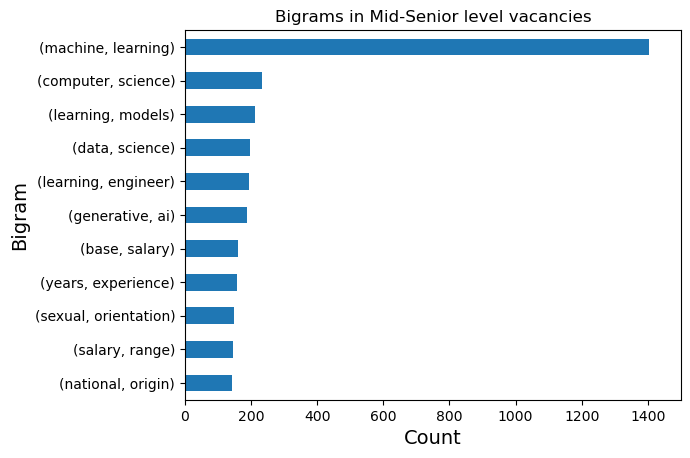

In [29]:
# Select all bigrams in mid-senior level vacancies
words_ms = basic_clean(''.join(str(bigram_ms['job_description_text'].tolist())))
# Plot top 10 bigrams in mid-senior level vacancies 
(pd.Series(nltk.ngrams(words_ms, 2)).value_counts())[:11].sort_values().plot(kind= 'barh')
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Bigram', fontsize = 14)
#plt.xticks(rotation = 75)
plt.title('Bigrams in Mid-Senior level vacancies')
plt.xlim(0, 1500)
#plt.savefig('bigram_ms.png',bbox_inches='tight')
plt.show()

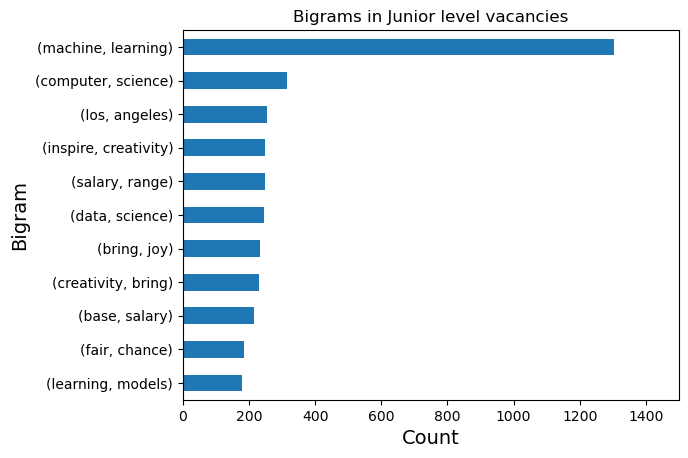

In [30]:
# Select all bigrams in junior level vacancies
words_jr = basic_clean(''.join(str(bigram_jr['job_description_text'].tolist())))
# Plot top 10 bigrams in junior level vacancies 
(pd.Series(nltk.ngrams(words_jr, 2)).value_counts())[:11].sort_values().plot(kind= 'barh')
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Bigram', fontsize = 14)
plt.title('Bigrams in Junior level vacancies')
plt.xlim(0, 1500)
#plt.savefig('bigram_jr.png',bbox_inches='tight')
plt.show()

In [31]:
%%markdown
## Model set before TF-IDF vectorizing

## Model set before TF-IDF vectorizing


In [32]:
model_dataset = pre_model.iloc[:,:5]
model_dataset.head(5)

,ID,Cali_ind,TikTok_ind,job_description_text,seniority_level
1,1,1,0,Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level
4,4,0,0,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level
21,21,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level
22,22,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level
23,23,0,0,About UsNational Grid is hiring a Senior Data ...,Mid-Senior level


In [31]:
model_dataset.to_csv('model_dataset.csv', index=False)
answerset = pre_model.loc[:,['ID', 'seniority_level']]
answerset.to_csv('answerset.csv', index=False)

In [33]:
%%markdown
# Sources
https://medium.com/data-science/from-dataframe-to-n-grams-e34e29df3460

# Sources
https://medium.com/data-science/from-dataframe-to-n-grams-e34e29df3460
